# SI figure 5

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec

# Necessary to import the experimental data of figure 2d. I think this is because it contains the fitfunctions, which are somehow referencing to the analysis class.

# Import functions
%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Define the analytical functions to be plotted

In [3]:
def PDF(phi, sigma):
    return 1./(sigma*np.sqrt(2*np.pi)) * np.exp(-phi**2/(2*sigma**2))

def PDF_new(phi, sigma, phi_c):
    return 1./2 * (1+np.sin(phi)) * PDF(phi,sigma)  + 1./2 * (1-np.sin(phi-phi_c)) * PDF(phi-phi_c, sigma) 

def BVLprob(sigma):
    return np.exp(-1./2*sigma**2)

def BVLprobNew(sigma, phi_c):
    return np.sqrt( 1./4*np.exp(-2*sigma**2) * ( np.exp(sigma**2/2)*np.sin(phi_c) - (-1 + np.cos(phi_c))*np.sinh(sigma**2) )**2 + \
                    1./4*np.exp(-2*sigma**2) * ( np.exp(sigma**2/2)*(1 + np.cos(phi_c)) + np.sin(phi_c)*np.sinh(sigma**2) )**2 )

# Generate the figure

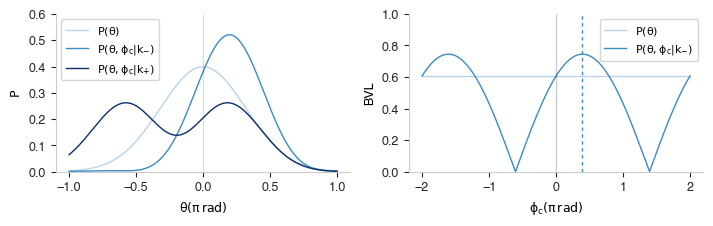

In [4]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54/1.5*fig_multiplier]) # ,constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])


N_phi_points = 1000
sigma = 1
colors = cm.Blues(np.linspace(0.3,1,3))

phi_pi = np.linspace(-1, 1, N_phi_points)
phi_c_opt = phi_pi[ int(N_phi_points/2) + np.argmax(BVLprobNew(sigma, phi_pi*np.pi)[int(N_phi_points/2):]) ]

Prob = PDF(phi_pi*np.pi, sigma)
Prob_new = PDF_new(phi_pi*np.pi, sigma, phi_c_opt*np.pi)
Prob_new_min = PDF_new(phi_pi*np.pi, sigma, -1*phi_c_opt*np.pi)

ax1.plot(phi_pi, Prob, label = r'$\mathrm{P(\theta)}$', color = colors[0], linewidth = linewidth_default*fig_multiplier)
ax1.plot(phi_pi, Prob_new, label = r'$\mathrm{P(\theta, \phi_c|k_{-})}$', color = colors[1], linewidth = linewidth_default*fig_multiplier)
ax1.plot(phi_pi, Prob_new_min, label = r'$\mathrm{P(\theta, \phi_c|k_{+})}$', color = colors[2], linewidth = linewidth_default*fig_multiplier)

ax1.axvline(x = 0, color = 'k', alpha = 0.2, linewidth = 0.5*fig_multiplier)

ax1.set_ylim([0,0.6])
ax1.set_xlabel(r'$\mathrm{ \theta(\pi \, rad) } $')
ax1.set_ylabel(r'$\mathrm{P}$')
ax1.legend(fontsize = 8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


phi_c_pi = np.linspace(-2,2,N_phi_points)
phi_c_opt_2 = phi_c_pi[ int(N_phi_points/2) + np.argmax(BVLprobNew(sigma, phi_c_pi*np.pi)[int(N_phi_points/2):]) ]

ax2.plot(phi_c_pi, BVLprob(sigma)*np.ones(len(phi_c_pi)), label = r'$\mathrm{P(\theta)}$', color = colors[0], linewidth =linewidth_default*fig_multiplier)
ax2.plot(phi_c_pi, BVLprobNew(sigma, phi_c_pi*np.pi), label = r'$\mathrm{P(\theta, \phi_c|k_{-})}$', color = colors[1], linewidth = linewidth_default*fig_multiplier)

dash_len = 2.5*fig_multiplier
space = 5*fig_multiplier
ax2.axvline(x = phi_c_opt_2, color = colors[1], dashes=(dash_len, 1./2*space), linewidth = linewidth_default*fig_multiplier)

ax2.axvline(x = 0, color = 'k', alpha = 0.2, linewidth = linewidth_default*fig_multiplier)

ax2.set_ylim([0,1])
ax2.set_xlabel(r'$\mathrm{ \phi_{c}(\pi \, rad) } $')
ax2.set_ylabel(r'BVL')
ax2.legend(fontsize = 8)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)



plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig5.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
